In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer


%matplotlib inline

# 1. Load data

In [2]:
columns = ["TimesPreg", "2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI",
    "DPF", "Age", "Target"]
pid = pd.read_csv('pima-indians-diabetes.csv', header = None) # None: to avoid setting first row as header
pid.columns = columns 


# 2. Explore dataset with descriptive statistics

In [3]:
pid.head()

,TimesPreg,2hrGTT,BP,Skin,2hrSerIns,BMI,DPF,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pid.info()  # all variables has data in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TimesPreg  768 non-null    int64  
 1   2hrGTT     768 non-null    int64  
 2   BP         768 non-null    int64  
 3   Skin       768 non-null    int64  
 4   2hrSerIns  768 non-null    int64  
 5   BMI        768 non-null    float64
 6   DPF        768 non-null    float64
 7   Age        768 non-null    int64  
 8   Target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pid.shape

(768, 9)

In [6]:
pid.dtypes #all vars are numeric type

TimesPreg      int64
2hrGTT         int64
BP             int64
Skin           int64
2hrSerIns      int64
BMI          float64
DPF          float64
Age            int64
Target         int64
dtype: object

In [7]:
pid.describe().T

,count,mean,std,min,25%,50%,75%,max
TimesPreg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
2hrGTT,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2hrSerIns,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Target,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Note:
- Number of time pregnant: max is 17?
- 2hrGTT: min is 0 --> There are cases not recorded --> Need viz for distribution 
- BP: min is 0 --> Cases not recorded. max is 122 : in acceptable value range
- Skin: min = 0 --> Cases not recorded. Max = 99mm --> acceptable value???
- 2HrSerIns: min =0, max = 846?
- BMI: min is 0. Max is 67? 
- DBF: the higher DBF, the stronger history and genetic relationship
- Age: acceptable range
- Target: in the right value range

#### Normal value:
- 2hrGTT: Measure capability to absorb sugar. Norm: 60-100, 1hr:<200, 2hr:<140
- BP: Normal: <80, HighBP stage1 : 80- <90, HighBP stage2: 90- <120, Crisis: >120
- Skin: estimate amt of body fat & protein reserved.  See reference
- 2hr: SerIns: normal range: 16-166(mIU/L)
- BMI: measure body fat based on height and weight. (BMI classification: < 18.5	underweight/18.5–24.9	normal weight/25.0–29.9	overweight/30.0–34.9 class I obesity/35.0–39.9 class II obesity/≥ 40.0	  class III obesity)

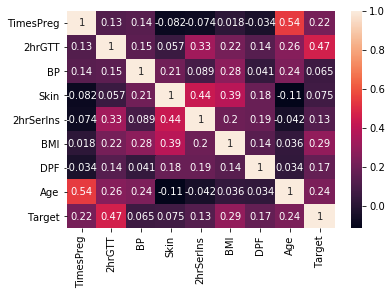

In [8]:
# Try raw dataset correlations:
corr = pid.corr()
sns.heatmap(corr, annot = True)


#### Note:

- Target variable has a positive, medium correlation with 2hrGTT(0.47)
- Target variable has a positive, small correlation with BMI(0.29) and Age(0.24)
                    

# 3. Explore dataset by visualization

In [9]:
feature_cols = pid[["TimesPreg", "2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI",
    "DPF", "Age"]]

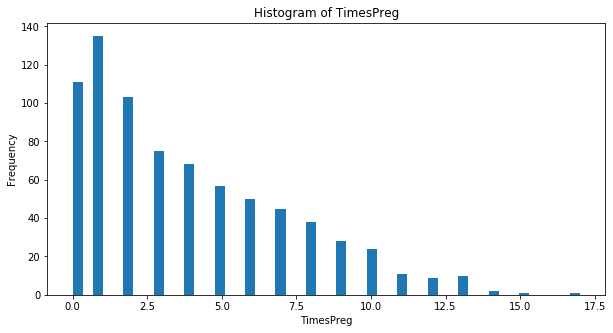

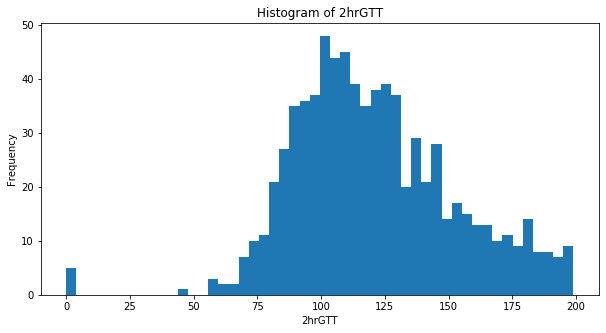

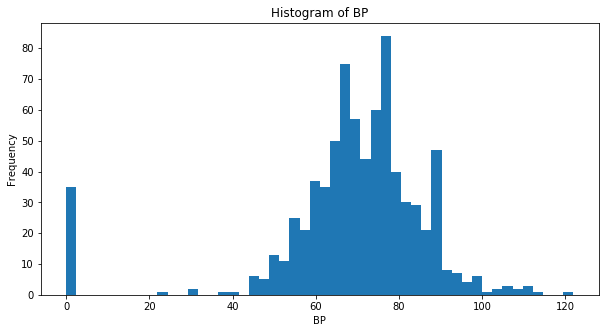

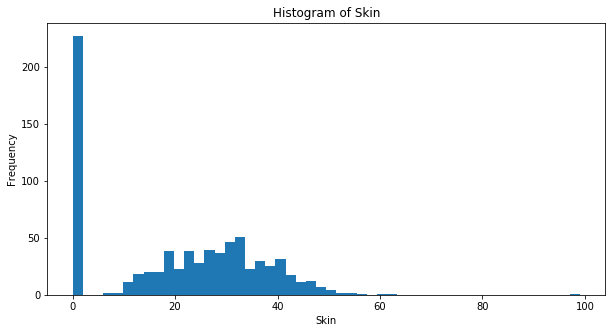

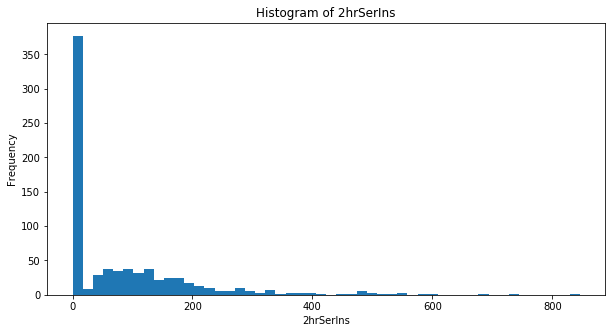

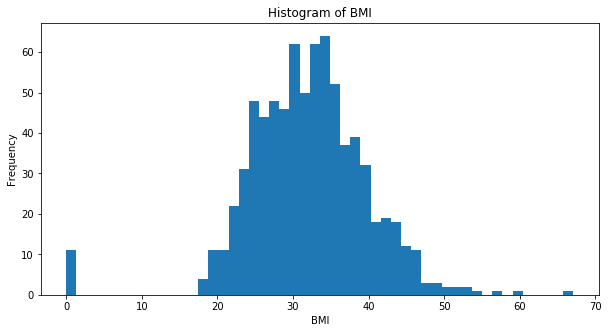

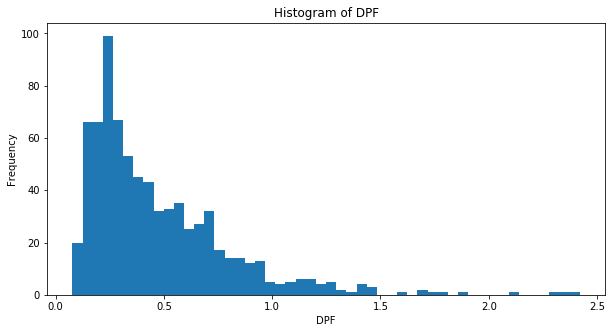

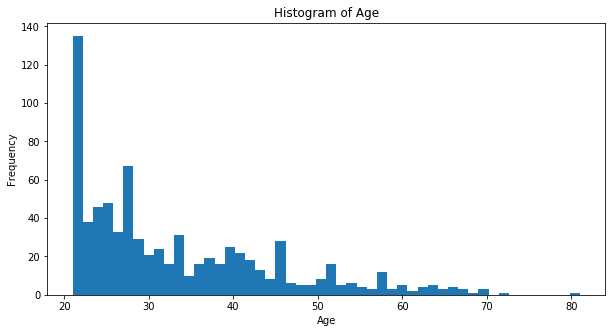

In [10]:
# Visualize variables distributions
# pid.hist(bins = 50, figsize =(20,15)) 
# plt.show()

# def plot_histogram(dataset, col, bins = 50):
#     fig = plt.figure(figsize=(10,5)) # define plot area
#     ax = fig.gca() # define axis    
#     dataset[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
#     ax.set_title('Histogram of ' + col) # Give the plot a main title
#     ax.set_xlabel(col) # Set text for the x axis
#     ax.set_ylabel('Frequency')# Set text for y axis
#     plt.show()


def plot_histogram(dataset, col, bins = 50):
    fig, ax = plt.subplots(figsize = (10,5))
    ax.hist(dataset[col], bins = bins)
    ax.set_title('Histogram of ' + col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()
        
for col in feature_cols:
    plot_histogram(pid, col)

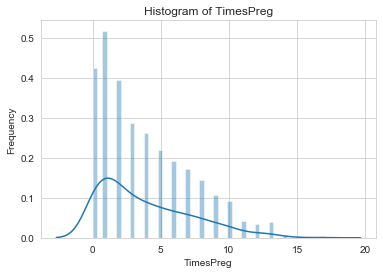

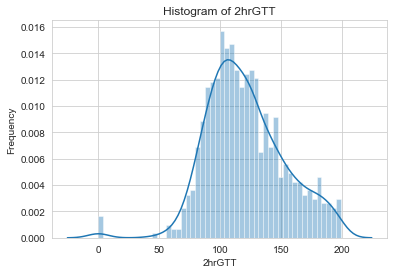

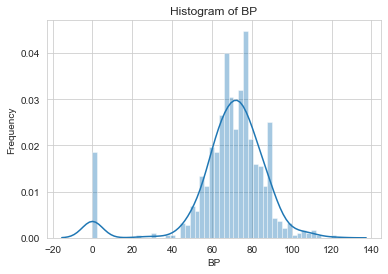

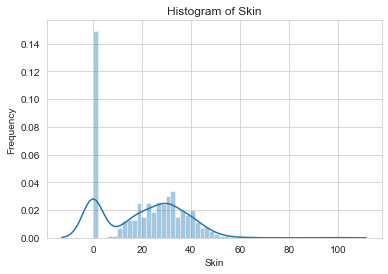

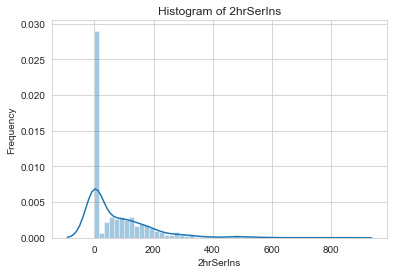

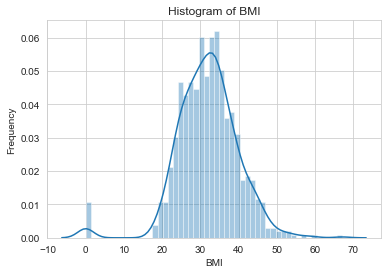

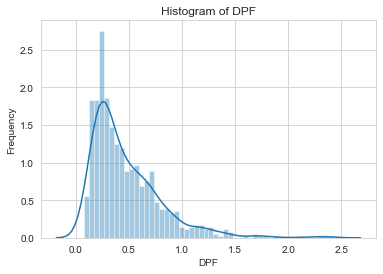

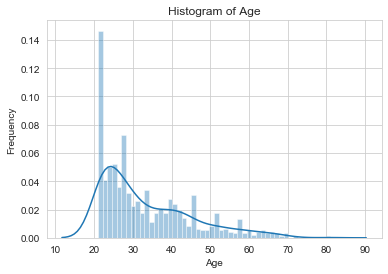

In [11]:
def plot_density_hist(dataset, cols, bins = 50, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(dataset[col], bins = bins, rug=False, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()
        
plot_density_hist(pid, feature_cols) 

#### Note:
 - Number of times pregnancy: right skewed
 - 2hrGTT: approx normal distribution, except for 0 values --> extrapolate cases with 0
 - BP: approx normal distribution
 - Skin: approx normal. Many missing value --> cannot del missing value but extrapolate
 - 2hrSerIns: approx normal. Extrapolate
 - BMI: approx normal
 - DPF: Right skewed. Keep as it is
 - Age: Right skewed


# 4. Clean dataset

In [12]:
# No format inconsistency

In [13]:
# Detect and treat duplicate values
pid.duplicated().sum()

#No duplicate values

0

In [14]:
# Detect and treat missing values
# Missing values in dataset is coded as 0
pid.replace(0, np.nan, inplace= True) 
pid.isnull().sum() 
 
# Note: Too many data missing in Skin and 2hrSerIns. 



TimesPreg    111
2hrGTT         5
BP            35
Skin         227
2hrSerIns    374
BMI           11
DPF            0
Age            0
Target       500
dtype: int64

In [35]:
X = pid[["TimesPreg", "2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI",
    "DPF", "Age",]]
y = pid['Target']

In [36]:
X.shape, y.shape

((768, 8), (768,))

In [37]:
impute_columns = ["2hrGTT", "BP",
    "Skin", "2hrSerIns", "BMI"]

In [38]:
iterimp = IterativeImputer(missing_values = np.nan, random_state=23)

In [45]:
newX = iterimp.fit_transform(X[impute_columns])

In [47]:
newXdf = pd.DataFrame(newX, columns = impute_columns)

In [50]:
newXdf.head()

,2hrGTT,BP,Skin,2hrSerIns,BMI
0,148.0,72.0,35.000000,212.347446,33.6
1,85.0,66.0,29.000000,66.407208,26.6
2,183.0,64.0,21.486494,272.954432,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [52]:
newX = pd.concat([newXdf, X[["TimesPreg", "DPF", "Age"]]], axis = 1)

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


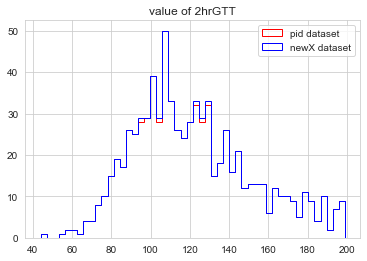

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


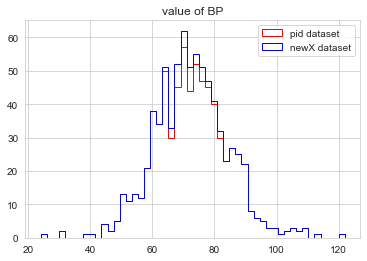

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


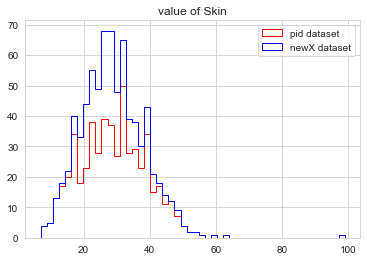

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


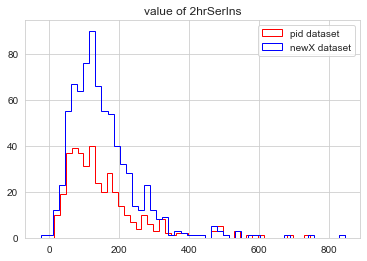

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


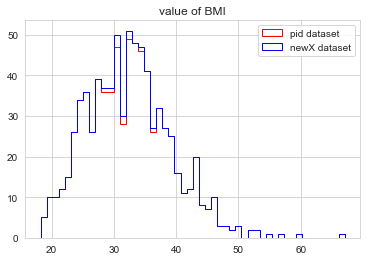

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


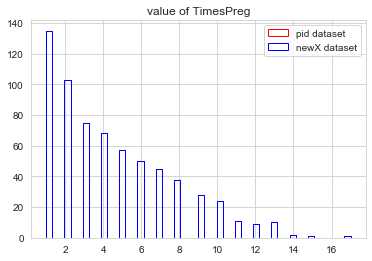

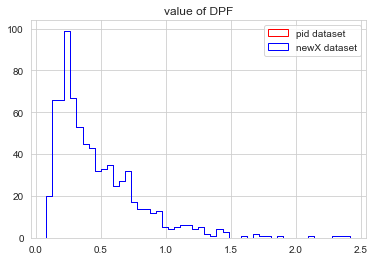

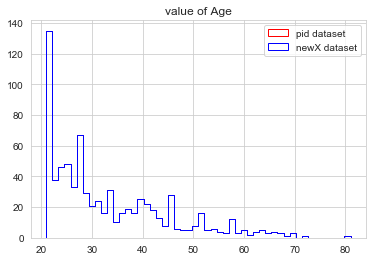

In [65]:
for col in newX.columns:
    plt.hist(pid[col], bins = 50, label='pid dataset', color = 'r' , histtype = 'step')
    plt.hist(newX[col], bins = 50, label='newX dataset', color = 'b', histtype = 'step')
    plt.legend()
    plt.title('value of ' + str(col))
    plt.show()

In [71]:
knnImp = KNNImputer()

In [72]:
newX2 = knnImp.fit_transform(X[impute_columns])

In [73]:
newXdf2 = pd.DataFrame(newX2, columns = impute_columns)

In [74]:
newX2 = pd.concat([newXdf2, X[["TimesPreg", "DPF", "Age"]]], axis = 1)

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


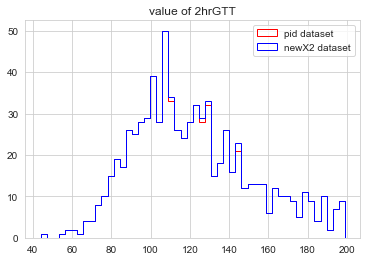

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


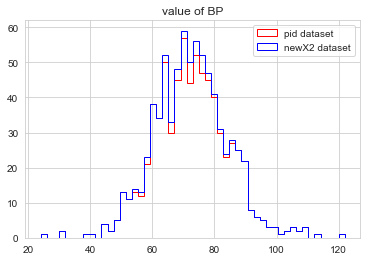

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


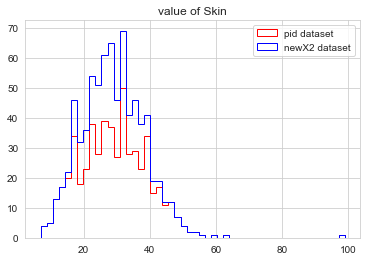

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


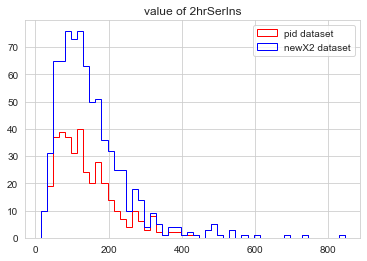

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


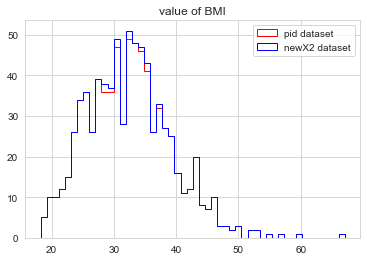

C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kidgods\Anaconda3\envs\python3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


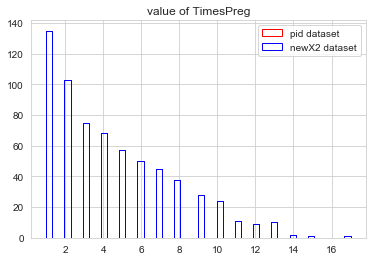

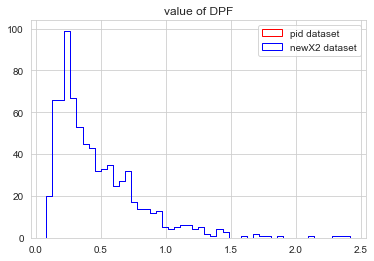

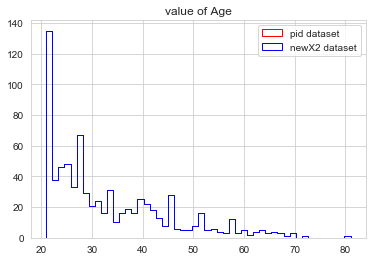

In [75]:
for col in newX2.columns:
    plt.hist(pid[col], bins = 50, label='pid dataset', color = 'r' , histtype = 'step')
    plt.hist(newX2[col], bins = 50, label='newX2 dataset', color = 'b', histtype = 'step')
    plt.legend()
    plt.title('value of ' + str(col))
    plt.show()